In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import fancyimpute
from fancyimpute import KNN
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
import xgboost as xgb

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

In [0]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
training = pd.read_csv('house_rent1.csv')

Columns
id\n
city/ City where the property is located
area/ Property area
rooms/ Quantity of rooms
bathroom/ Quantity of bathroom
parking spaces / Quantity of parking spaces
floo / Floor
animalAceita animais? / Acept animals?
furnitureMobilhada? / Furniture?
hoa/ Homeowners association tax
rent amount / Rent amount
property tax / Property tax
fire insurance / Fire Insurance
total
 total / Total

In [962]:
training.shape

(10692, 13)

In [963]:
training.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [964]:
training.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [0]:
#training = training.drop(training[training['area']==0].index, axis=0)

In [966]:
training.shape

(10692, 13)

In [0]:
training = training.drop(training[training['rooms']==0].index, axis=0)

In [968]:
training.shape

(10692, 13)

In [0]:
training = training.drop(training[training['bathroom']==0].index, axis=0)

In [970]:
training.shape

(10692, 13)

In [0]:
#training = training.drop(training[training['hoa (R$)']==0].index, axis=0)

In [972]:
training.shape

(10692, 13)

In [0]:
training = training.drop(training[training['rent amount (R$)']==0].index, axis=0)

In [974]:
training.shape

(10692, 13)

In [0]:

#training = training.drop(training[training['property tax (R$)']==0].index, axis=0)

In [976]:
training.shape

(10692, 13)

In [0]:

training = training.drop(training[training['fire insurance (R$)']==0].index, axis=0)

In [978]:
training.shape

(10692, 13)

In [979]:
training['city']

0             São Paulo
1             São Paulo
2          Porto Alegre
3          Porto Alegre
4             São Paulo
              ...      
10687      Porto Alegre
10688         São Paulo
10689    Rio de Janeiro
10690    Rio de Janeiro
10691         São Paulo
Name: city, Length: 10692, dtype: object

In [980]:
training['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [981]:
training['area']

0         70
1        320
2         80
3         51
4         25
        ... 
10687     63
10688    285
10689     70
10690    120
10691     80
Name: area, Length: 10692, dtype: int64

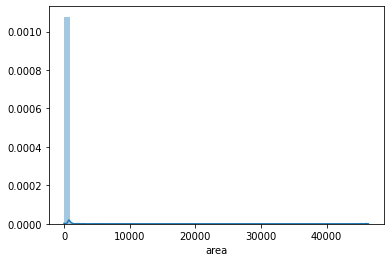

In [982]:
plot_area = sns.distplot(training['area'],bins=50)

In [983]:
training['rooms']

0        2
1        4
2        1
3        2
4        1
        ..
10687    2
10688    4
10689    3
10690    2
10691    2
Name: rooms, Length: 10692, dtype: int64

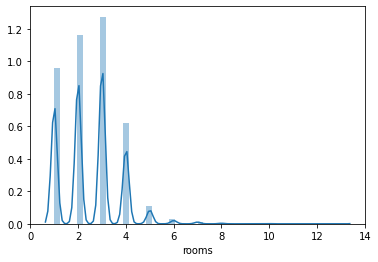

In [984]:
plot_rooms = sns.distplot(training['rooms'],bins=50)

In [985]:
training['bathroom']

0        1
1        4
2        1
3        1
4        1
        ..
10687    1
10688    4
10689    3
10690    2
10691    1
Name: bathroom, Length: 10692, dtype: int64

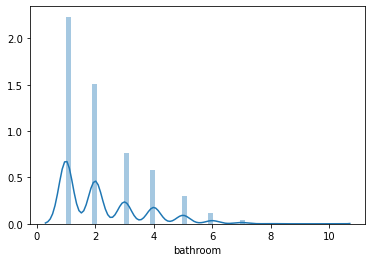

In [986]:
plot_bathroom = sns.distplot(training['bathroom'],bins=50)

In [987]:
training['parking spaces']

0        1
1        0
2        1
3        0
4        0
        ..
10687    1
10688    4
10689    0
10690    2
10691    0
Name: parking spaces, Length: 10692, dtype: int64

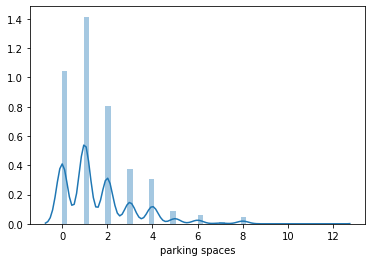

In [988]:
plot_parking = sns.distplot(training['parking spaces'],bins=50)

In [989]:
training['floor']

0         7
1        20
2         6
3         2
4         1
         ..
10687     5
10688    17
10689     8
10690     8
10691     -
Name: floor, Length: 10692, dtype: object

In [990]:
training['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [991]:
training['animal']

0            acept
1            acept
2            acept
3            acept
4        not acept
           ...    
10687    not acept
10688        acept
10689    not acept
10690        acept
10691        acept
Name: animal, Length: 10692, dtype: object

In [992]:
training['animal'].unique()


array(['acept', 'not acept'], dtype=object)

In [993]:
training['furniture']

0            furnished
1        not furnished
2        not furnished
3        not furnished
4        not furnished
             ...      
10687        furnished
10688    not furnished
10689        furnished
10690        furnished
10691    not furnished
Name: furniture, Length: 10692, dtype: object

In [994]:
training['furniture'].unique()

array(['furnished', 'not furnished'], dtype=object)

In [995]:
training['hoa (R$)']

0        2065
1        1200
2        1000
3         270
4           0
         ... 
10687     402
10688    3100
10689     980
10690    1585
10691       0
Name: hoa (R$), Length: 10692, dtype: int64

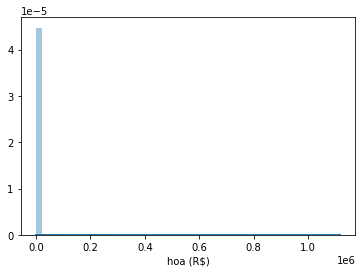

In [996]:
plot_hoa = sns.distplot(training['hoa (R$)'],bins=50)

In [997]:
training['rent amount (R$)']

0         3300
1         4960
2         2800
3         1112
4          800
         ...  
10687     1478
10688    15000
10689     6000
10690    12000
10691     1400
Name: rent amount (R$), Length: 10692, dtype: int64

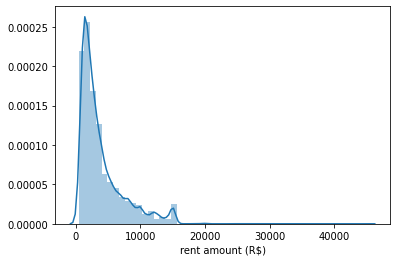

In [998]:
plot_rent = sns.distplot(training['rent amount (R$)'],bins=50)

In [999]:
training['property tax (R$)']

0         211
1        1750
2           0
3          22
4          25
         ... 
10687      24
10688     973
10689     332
10690     279
10691     165
Name: property tax (R$), Length: 10692, dtype: int64

In [1000]:
training['property tax (R$)'].unique()

array([ 211, 1750,    0, ..., 1370,  602, 1287])

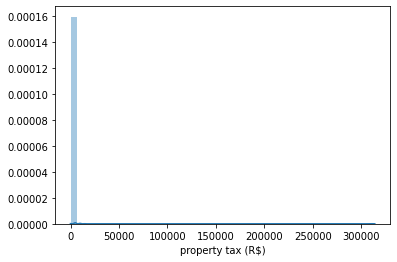

In [1001]:
plot_propertytax = sns.distplot(training['property tax (R$)'],bins=50)

In [1002]:
training['fire insurance (R$)']

0         42
1         63
2         41
3         17
4         11
        ... 
10687     22
10688    191
10689     78
10690    155
10691     22
Name: fire insurance (R$), Length: 10692, dtype: int64

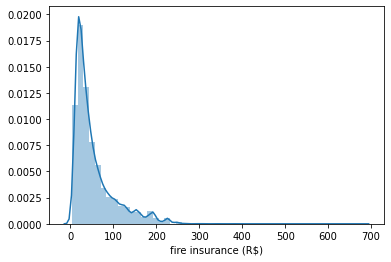

In [1003]:
plot_fire = sns.distplot(training['fire insurance (R$)'],bins=50)

In [1004]:
training['total (R$)']

0         5618
1         7973
2         3841
3         1421
4          836
         ...  
10687     1926
10688    19260
10689     7390
10690    14020
10691     1587
Name: total (R$), Length: 10692, dtype: int64

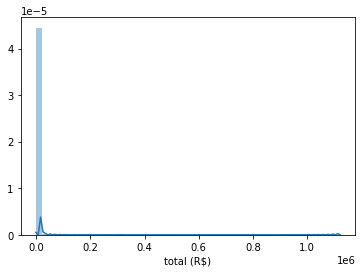

In [1005]:
plot_total = sns.distplot(training['total (R$)'],bins=50)

MISSING VALUE ANALYSIS

In [0]:
mising_value = pd.DataFrame(training.isnull().sum())

In [1007]:
mising_value

,0
city,0
area,0
rooms,0
bathroom,0
parking spaces,0
floor,0
animal,0
furniture,0
hoa (R$),0
rent amount (R$),0


NO MISSING VALUES FOUND

OUTLIER ANALYSIS 


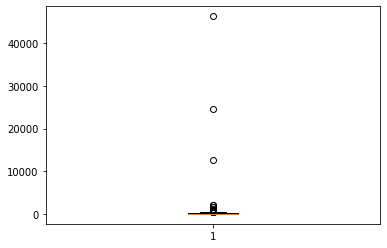

In [1008]:
out_area=plt.boxplot(training['area'])

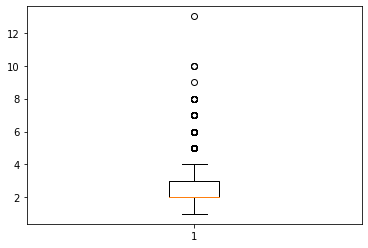

In [1009]:
out_rooms=plt.boxplot(training['rooms'])

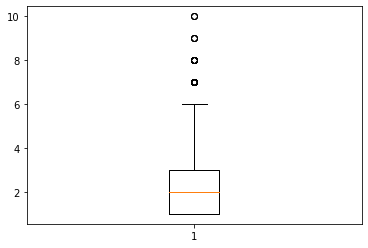

In [1010]:
out_bath=plt.boxplot(training['bathroom'])

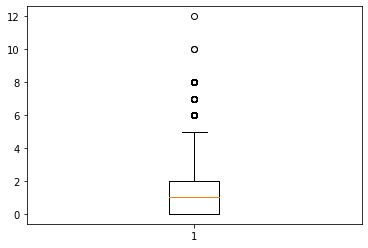

In [1011]:
out_park=plt.boxplot(training['parking spaces'])

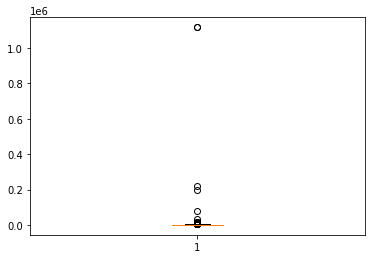

In [1012]:
out_hoa=plt.boxplot(training['hoa (R$)'])

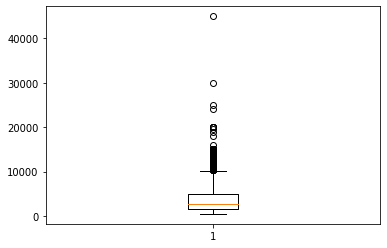

In [1013]:
out_rent=plt.boxplot(training['rent amount (R$)'])

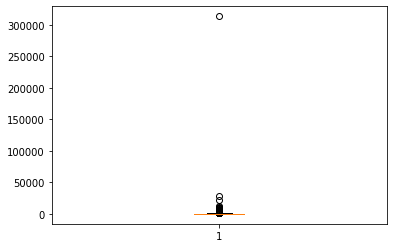

In [1014]:
out_property=plt.boxplot(training['property tax (R$)'])

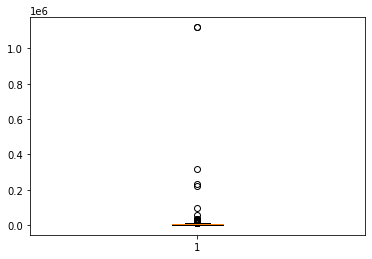

In [1015]:
out_total=plt.boxplot(training['total (R$)'])

In [0]:
col_names=["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","property tax (R$)","fire insurance (R$)","total (R$)"]

In [1017]:
col_names

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [0]:
cat_var=["city","floor","animal","furniture"]

In [1019]:
cat_var

['city', 'floor', 'animal', 'furniture']

In [0]:
training = training.drop(['city','floor','animal','furniture'], axis=1)

In [1021]:
training.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70,2,1,1,2065,3300,211,42,5618
1,320,4,4,0,1200,4960,1750,63,7973
2,80,1,1,1,1000,2800,0,41,3841
3,51,2,1,0,270,1112,22,17,1421
4,25,1,1,0,0,800,25,11,836


DETERMINATION OF INTERQUARTILE RANGE (iqr)

In [0]:
def outlier_analysis(col_names):
    print(col_names)
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(training[col_names], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    training.loc[training[col_names] < minimum,col_names] = np.nan
    training.loc[training[col_names] > maximum,col_names] = np.nan

In [1023]:
outlier_analysis('area')

area
182.0 56.0
-133.0 371.0


In [0]:
mising_value=pd.DataFrame(training.isnull().sum())

In [0]:
mising_value = mising_value.rename(columns = {'index': 'Variable', 0: 'Missing_percentage'})


In [1026]:
mising_value

,Missing_percentage
area,672
rooms,0
bathroom,0
parking spaces,0
hoa (R$),0
rent amount (R$),0
property tax (R$),0
fire insurance (R$),0
total (R$),0


In [0]:
mising_value['Missing_percentage'] = (mising_value['Missing_percentage']/len(training))*100

In [1028]:
mising_value['Missing_percentage']

area                   6.285073
rooms                  0.000000
bathroom               0.000000
parking spaces         0.000000
hoa (R$)               0.000000
rent amount (R$)       0.000000
property tax (R$)      0.000000
fire insurance (R$)    0.000000
total (R$)             0.000000
Name: Missing_percentage, dtype: float64

**Only area variable has missing values with missing percentage of 6.285073**

In [1029]:
training['area'].loc[70]

220.0

In [0]:
training['area'].loc[70] = np.nan


In [1031]:
training['area'].loc[70]

nan

In [0]:
training['area'] = training['area'].fillna(training['area'].mean())

In [1033]:
training['area'].loc[70]

116.0543966463719

In [0]:
#training['area'] = training['area'].fillna(training['area'].median())

In [0]:
#training['area'].loc[70]

In [0]:
#training = pd.DataFrame(KNN(k = 13).fit_transform(training), columns = training.columns, index=training.index)

In [0]:
#training['area'].loc[70]

In [0]:
df=training.copy()
training=df.copy()

In [1039]:
training.copy()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70.0,2,1,1,2065,3300,211,42,5618
1,320.0,4,4,0,1200,4960,1750,63,7973
2,80.0,1,1,1,1000,2800,0,41,3841
3,51.0,2,1,0,270,1112,22,17,1421
4,25.0,1,1,0,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...
10687,63.0,2,1,1,402,1478,24,22,1926
10688,285.0,4,4,4,3100,15000,973,191,19260
10689,70.0,3,3,0,980,6000,332,78,7390
10690,120.0,2,2,2,1585,12000,279,155,14020


In [0]:
df_corr = training.loc[:,col_names]

In [1041]:
df_corr

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70.0,2,1,1,2065,3300,211,42,5618
1,320.0,4,4,0,1200,4960,1750,63,7973
2,80.0,1,1,1,1000,2800,0,41,3841
3,51.0,2,1,0,270,1112,22,17,1421
4,25.0,1,1,0,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...
10687,63.0,2,1,1,402,1478,24,22,1926
10688,285.0,4,4,4,3100,15000,973,191,19260
10689,70.0,3,3,0,980,6000,332,78,7390
10690,120.0,2,2,2,1585,12000,279,155,14020


**FEATURE SELECTION(CORRELATION ANALYSIS)**

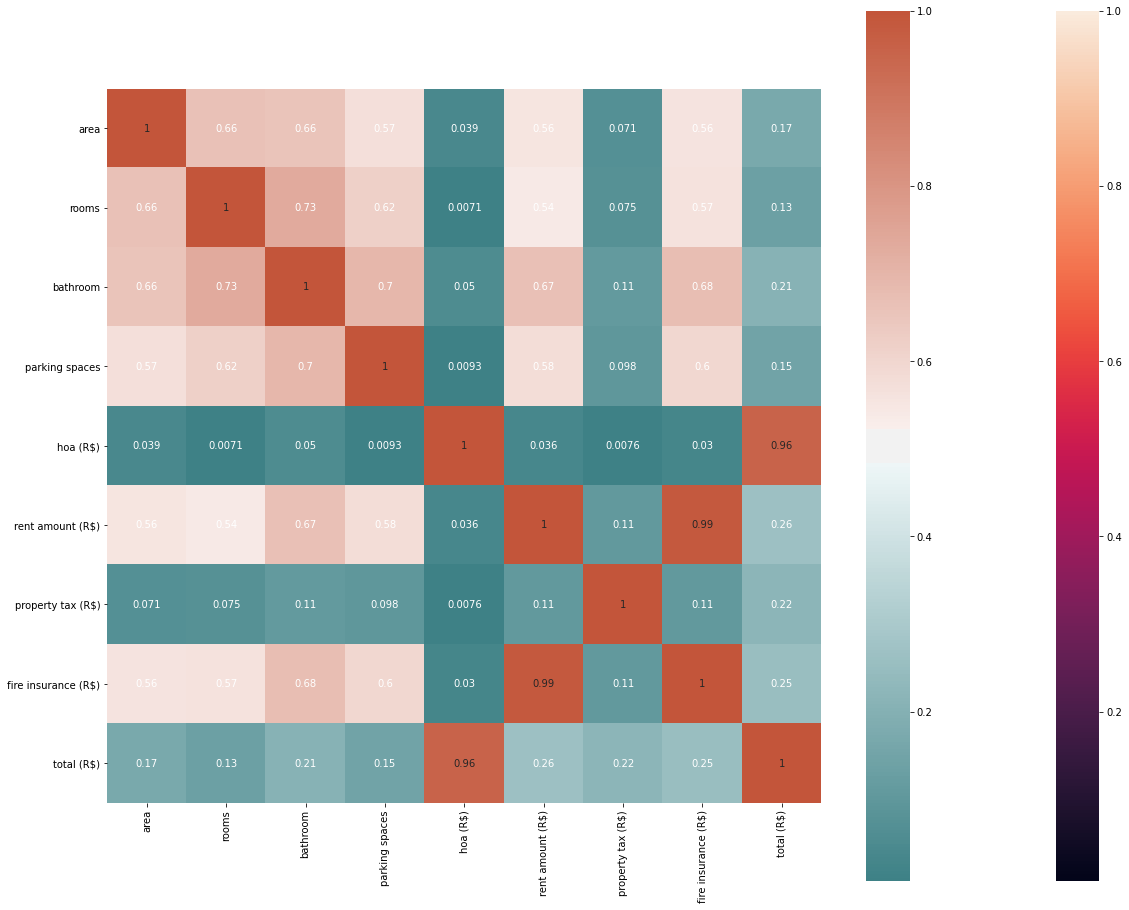

In [1042]:
#Set the width and hieght of the plot
fun, ax = plt.subplots(figsize=(20, 16))

#Generate correlation matrix
cor_mat = df_corr.corr() 
sns.heatmap(df_corr.corr(), annot = True)

#Plot using seaborn library
sns.heatmap(cor_mat, mask=np.zeros_like(cor_mat, dtype=np.bool), cmap=sns.diverging_palette(200, 20, as_cmap=True),
            square=True, ax=ax)

In [1043]:
training.head(5)

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,70.0,2,1,1,2065,3300,211,42,5618
1,320.0,4,4,0,1200,4960,1750,63,7973
2,80.0,1,1,1,1000,2800,0,41,3841
3,51.0,2,1,0,270,1112,22,17,1421
4,25.0,1,1,0,0,800,25,11,836


In [0]:
#col_names=["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","property tax (R$)","fire insurance (R$)","total (R$)"]
#col_names=["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","""total (R$)"]

In [0]:
training=training.drop(['fire insurance (R$)'],axis=1)

In [1046]:
training.shape

(10692, 8)

In [0]:
col_names=["area","rooms","bathroom","parking spaces","hoa (R$)","rent amount (R$)","property tax (R$)","total (R$)"]

### **FEATURE SCALING**
**(Standardization)**

In [1048]:
for i in col_names:
    print(i)
    training[i] = (training[i] - min(training[i]))/(max(training[i]) - min(training[i]))

area
rooms
bathroom
parking spaces
hoa (R$)
rent amount (R$)
property tax (R$)
total (R$)


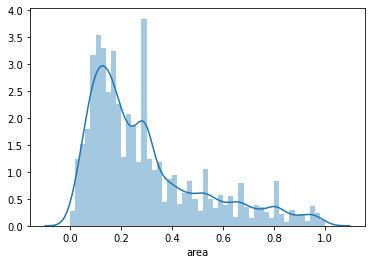

In [1049]:
scale_area=sns.distplot(training['area'],bins=50)

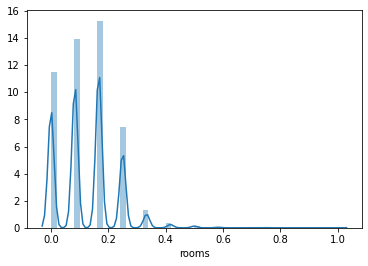

In [1050]:
scale_rooms=sns.distplot(training['rooms'],bins=50)

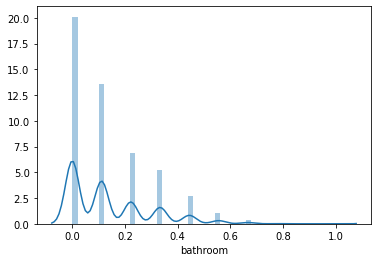

In [1051]:
scale_bathroom=sns.distplot(training['bathroom'],bins=50)

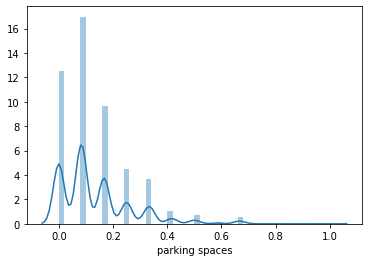

In [1052]:
scale_parkingspaces=sns.distplot(training['parking spaces'],bins=50)

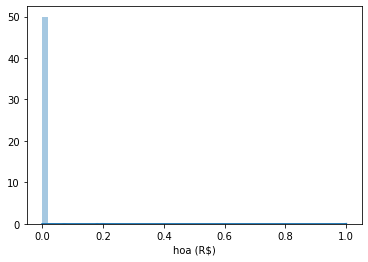

In [1053]:

scale_hoa=sns.distplot(training['hoa (R$)'],bins=50)

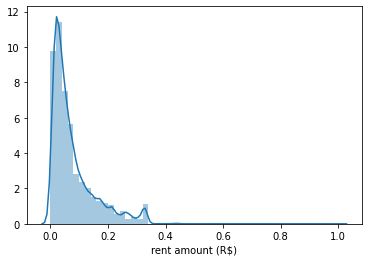

In [1054]:
scale_rentamount =sns.distplot(training['rent amount (R$)'],bins=50)

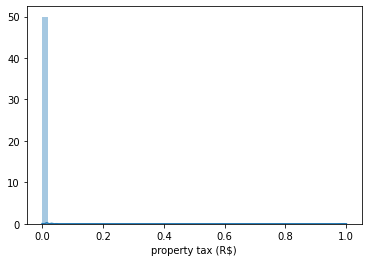

In [1055]:
scale_propertytax=sns.distplot(training['property tax (R$)'],bins=50)

In [1056]:
training.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301


In [0]:
df=training.copy()
training=df.copy()

In [1058]:
df.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301


In [1059]:
training.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301


In [0]:
Sample_Index = np.random.rand(len(training)) < 0.8

train = training [Sample_Index]
test = training [~Sample_Index]

In [1061]:
test.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
6,0.169916,0.083333,0.000000,0.000000,0.000662,0.032548,0.000271,0.002011
9,0.066852,0.000000,0.000000,0.000000,0.000528,0.041526,0.000112,0.002194


In [1062]:
train.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301
5,0.292631,0.166667,0.222222,0.583333,0.000000,0.169473,0.002659,0.007553
7,0.562674,0.250000,0.333333,0.333333,0.002018,0.062245,0.005531,0.006033
8,0.392758,0.083333,0.111111,0.083333,0.000895,0.326599,0.000797,0.014239


In [0]:
train_cols = training.columns[1:8]

LINEAR REGRESSION

In [0]:

#Import libraries for LR
import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(train.iloc[:,7], train.iloc[:,0:7]).fit()

In [1065]:
# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             total (R$)   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.462e+08
Date:                Thu, 09 Apr 2020   Prob (F-statistic):                        0.00
Time:                        10:57:00   Log-Likelihood:                          78865.
No. Observations:                8527   AIC:                                 -1.577e+05
Df Residuals:                    8520   BIC:                                 -1.577e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
area              -4.756e-05   1.55e-06    -30.689      0.000   -5.06e-05   -4.45e-05
rooms             -9.787e-05   3.88e-06    -25.196      0.000      -0.000   -9.03e-05
bathroom           6.556e-05    2.8e-06     23.394      0.000    6.01e-05    7.11e-05
parking spaces     -1.93e-05   2.75e-06     -7.015      0.000   -2.47e-05   -1.39e-05
hoa (R$)              0.9978   1.62e-05   6.16e+04      0.000       0.998       0.998
rent amount (R$)      0.0403   4.59e-06   8776.198      0.000       0.040       0.040
property tax (R$)     0.2802    2.3e-05   1.22e+04      0.000       0.280       0.280
==============================================================================
Omnibus:                     2745.167   Durbin-Watson:                   1.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14096.645
Skew:                           1.464   Prob(JB):                         0.00
Kurtosis:                       8.577   Cond. No.                         43.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# make the predictions by the model
predictions_LR = model.predict(test.iloc[:,0:7]) 



In [1067]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,7], predictions_LR)


1.7314807305138495

In [1068]:
training.head(5)

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301


DECISION TREE

In [1069]:
df.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301


In [1070]:
training.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301


In [0]:
training,testing=train_test_split(training, test_size=0.2)

In [0]:
Sample_Index = np.random.rand(len(training)) < 0.8

train = training [Sample_Index]
test = training [~Sample_Index]

In [0]:

fit_DT = DecisionTreeRegressor(max_depth=10).fit(train.iloc[:,0:7], train.iloc[:,7])


In [0]:
#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,0:7])

In [1075]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test.iloc[:,7], predictions_DT)


16.097158710052632

**RANDOM FOREST**



In [1076]:
training.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
8601,0.233983,0.083333,0.000000,0.083333,0.001098,0.061728,0.000293,0.003627
4759,0.025070,0.000000,0.000000,0.000000,0.000000,0.012346,0.000268,0.000534
5442,0.270195,0.166667,0.222222,0.166667,0.001074,0.066218,0.001065,0.004001
5081,0.554318,0.166667,0.222222,0.166667,0.003133,0.184444,0.002659,0.011265
5452,0.100279,0.083333,0.111111,0.166667,0.000466,0.048507,0.000077,0.002403


In [1077]:
df.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301


In [0]:
training=df.copy()

In [1079]:
training.head()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,0.164345,0.083333,0.000000,0.083333,0.001849,0.063973,0.000673,0.004573
1,0.860724,0.250000,0.333333,0.000000,0.001074,0.101235,0.005579,0.006676
2,0.192201,0.000000,0.000000,0.083333,0.000895,0.052750,0.000000,0.002985
3,0.111421,0.083333,0.000000,0.000000,0.000242,0.014860,0.000070,0.000824
4,0.038997,0.000000,0.000000,0.000000,0.000000,0.007856,0.000080,0.000301


In [0]:
train_cols = training.columns[1:8]

In [0]:
X = training.values[:, 0:7]
Y = training.values[:,7]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [0]:
def rmsle(y,y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))
def scores(y, y_):
    print('r square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-X_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 
def test_scores(model):
    print('************* TRAINING DATA RESULTS ************ ')
    print()
    #Predicting result on Training data
    y_pred = model.predict(X_train)
    scores(y_train,y_pred)
    print('RMSLE:',rmsle(y_train,y_pred))
    print()
    print('********* TEST DATA RESULTS **********')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(X_test)
    scores(y_test,y_pred)
    print('RMSLE:',rmsle(y_test,y_pred))

In [1084]:
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
              'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
Forest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
Forest_cv = RandomizedSearchCV(Forest, random_grid, cv=5)

# Fit it to the data
Forest_cv.fit(X, Y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(Forest_cv.best_params_))
print("Best score is {}".format(Forest_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}
Best score is 0.7701355186114488


[2.46414498e-05 5.66047118e-06 1.01838072e-05 1.29497325e-05
 8.22723105e-01 1.50462563e-01 2.67608963e-02]


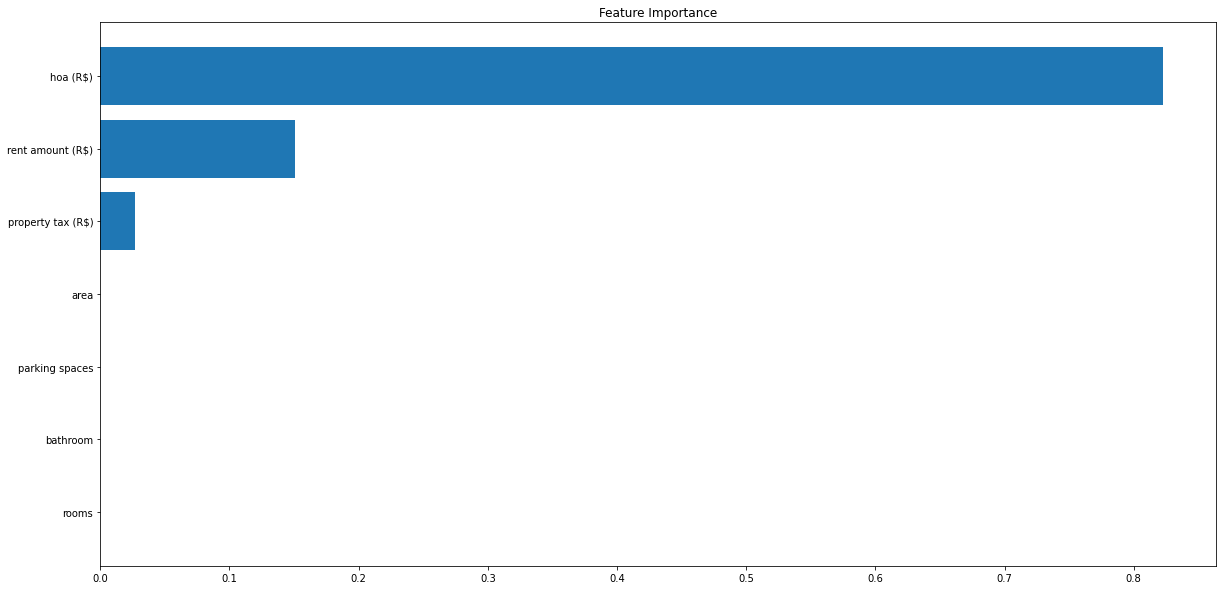

************* TRAINING DATA RESULTS ************ 

r square   0.5896775609186935
Adjusted r square:0.5893414278498148
MAPE:inf
MSE: 0.00010934956957016036
RMSE: 0.010457034453905197
RMSLE: 0.0069422278880953234

********* TEST DATA RESULTS **********

r square   0.3019971156503245
Adjusted r square:0.2997042859035165
MAPE:12.603656291735499
MSE: 1.26443952337815e-05
RMSE: 0.003555895841244721
RMSLE: 0.0033075235291199234


In [1085]:
# Instantiate a Forest regressor: Forest
Forest = RandomForestRegressor(n_estimators=100, min_samples_split= 2, min_samples_leaf=4, max_features='auto', max_depth=9, bootstrap=True)

# Fit the regressor to the data
Forest.fit(X_train,y_train)

# Compute and print the coefficients
Forest_features = Forest.feature_importances_
print(Forest_features)

# Sort feature importances in descending order
indices = np.argsort(Forest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(X_train).shape[1]),Forest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(X_train).shape[1]), names)
plt.savefig('Random forest feature importance')
plt.show()# Make predictions
test_scores(Forest)